<center><h1>  <font color='green'>Prueba- Predicción del precio de vuelos</font></h1></center><hr>

### José Quintanilla Inostroza G-90

## Objetivo

El objetivo de esta prueba es desarrollar un modelo predictivo capaz de estimar el precio de un boleto de avión basándonos en diversas características del vuelo. 

Este problema representa un escenario común en la industria de viajes, donde las aerolíneas y las agencias de viajes buscan ofrecer a los pasajeros tarifas competitivas y precisas.

Para esto utilizaremos los archivos 
* **business.csv**
* **economy.csv**


### <strong><font color="green"> Desarrollo </font></strong>

In [1]:
# Cargamos las librerias necesarias 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.utils import resample  # Importar la función para tomar una muestra
import joblib

In [2]:
# pip install xgboost

##### <strong><font color="green">1. Describe con detenimiento el problema de negocio que se desea resolver, y cómo se va a hacer esto. Indica la metodología, tareas a realizar, variable objetivo a predecir, etc.
</font></strong>

### Descripción del Problema de Negocio

En este proyecto, simulamos el trabajo en una agencia de viajes en línea que busca ofrecer a los clientes una herramienta que estime con precisión el precio de los boletos de avión para su próximo viaje.

El precio de un boleto de avión varía significativamente debido a múltiples factores, tales como:

* Aerolínea
* Destino y origen
* Temporada (alta/baja demanda)
* Clase de servicio (Business/Economy)
* Anticipación de la reserva
* Número de escalas

Actualmente, los clientes enfrentan incertidumbre al buscar vuelos, ya que los precios pueden cambiar dinámicamente. 
Nuestro análisis permitirá a los usuarios ingresar información sobre su vuelo y obtener una estimación de precio basada en datos históricos, la idea es mejorar la capacidad de planificación y optimización de costos. Para esto seguiremos los siguientes pasos:

#### Metodología
**Exploración y limpieza de datos**

* Identificar valores faltantes y corregir inconsistencias en los datos.
* Extraer información relevante de las fechas (mes, día de la semana) según se requiera.
* Convertir variables de texto en variables numéricas/categóricas para el modelo.

**Análisis exploratorio de datos (EDA)**

* Visualizar la distribución de los precios en economy y business.
* Analizar cómo varían los precios según aerolínea, ruta, temporada y escalas.
* Identificar correlaciones entre variables para determinar cuáles son más relevantes.

**Creación de características (Feature Engineering)**
Acá convertiremos las variables en datos que nos permitan hacer un análisis mayor, por ejemplo:

* Extraer la cantidad de días de anticipación (anticipation_days).
* Convertir dep_time y arr_time en variables numéricas (ej., franja horaria).
* Transformar time_taken en minutos.
* Codificar variables categóricas (one-hot encoding o label encoding).

**Modelado Predictivo**

* Definir la variable objetivo: **price** (precio del boleto).

**Entrenar modelos de Machine Learning como**:

* Regresión Lineal (baseline).
* Árboles de Decisión y Random Forest.
* Evaluar los modelos con métricas como RMSE y R².

**Evaluación y optimización**

* Comparar el desempeño de los modelos.
* Ajustar hiperparámetros para mejorar la precisión.
* Probar validación cruzada para evitar sobreajuste.

##### <strong><font color="green">2. Carga los dataset entregados y genera un reporte de calidad de los mismos. Indica qué estrategias se van a utilizar para aquellos puntos encontrados (Indicar nulos, outliers, valores perdidos, que se hará con esto, etc.)</font></strong>

### Importamos la base de datos

### Análisis exploratorio de los datos

In [3]:
# Cargar el archivo a un DataFrame
df_bus = pd.read_excel("business.xlsx")

# validamos la carga
print('******** Muestra del DataFrame del archivo business.xlsx********')
display(df_bus.head())
print('\n******** Total Filas y Columnas ********')
print(f"Total de filas: {df_bus.shape[0]}")
print(f"Total de columnas: {df_bus.shape[1]}\n")

print('\n******** Información del DataFrame business ********')
print(df_bus.info())

******** Muestra del DataFrame del archivo business.xlsx********


,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price
0,2022-02-11,Air India,AI,868,18:00:00,Delhi,02h 00m,non-stop,20:00:00,Mumbai,25612
1,2022-02-11,Air India,AI,624,19:00:00,Delhi,02h 15m,non-stop,21:15:00,Mumbai,25612
2,2022-02-11,Air India,AI,531,20:00:00,Delhi,24h 45m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,20:45:00,Mumbai,42220
3,2022-02-11,Air India,AI,839,21:25:00,Delhi,26h 30m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,23:55:00,Mumbai,44450
4,2022-02-11,Air India,AI,544,17:15:00,Delhi,06h 40m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,23:55:00,Mumbai,46690



******** Total Filas y Columnas ********
Total de filas: 93487
Total de columnas: 11


******** Información del DataFrame business ********
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93487 entries, 0 to 93486
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        93487 non-null  datetime64[ns]
 1   airline     93487 non-null  object        
 2   ch_code     93487 non-null  object        
 3   num_code    93487 non-null  int64         
 4   dep_time    93487 non-null  object        
 5   from        93487 non-null  object        
 6   time_taken  93487 non-null  object        
 7   stop        93487 non-null  object        
 8   arr_time    93487 non-null  object        
 9   to          93487 non-null  object        
 10  price       93487 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(9)
memory usage: 7.8+ MB
None


In [4]:
# Cargar el archivo a un DataFrame
df_eco = pd.read_excel("economy.xlsx")

# validamos la carga
print('\n******** Muestra del DataFrame del archivo economy.xlsx********')
display(df_eco.head())
print('\n******** Total Filas y Columnas ********')
print(f"Total de filas: {df_eco.shape[0]}")
print(f"Total de columnas: {df_eco.shape[1]}\n")

print('\n******** Información del DataFrame economy ********')
print(df_eco.info())


******** Muestra del DataFrame del archivo economy.xlsx********


,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price
0,2022-02-11,SpiceJet,SG,8709,18:55:00,Delhi,02h 10m,non-stop,21:05:00,Mumbai,5953
1,2022-02-11,SpiceJet,SG,8157,06:20:00,Delhi,02h 20m,non-stop,08:40:00,Mumbai,5953
2,2022-02-11,AirAsia,I5,764,04:25:00,Delhi,02h 10m,non-stop,06:35:00,Mumbai,5956
3,2022-02-11,Vistara,UK,995,10:20:00,Delhi,02h 15m,non-stop,12:35:00,Mumbai,5955
4,2022-02-11,Vistara,UK,963,08:50:00,Delhi,02h 20m,non-stop,11:10:00,Mumbai,5955



******** Total Filas y Columnas ********
Total de filas: 206774
Total de columnas: 11


******** Información del DataFrame economy ********
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206774 entries, 0 to 206773
Data columns (total 11 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   date        206774 non-null  datetime64[ns]
 1   airline     206774 non-null  object        
 2   ch_code     206774 non-null  object        
 3   num_code    206774 non-null  int64         
 4   dep_time    206774 non-null  object        
 5   from        206774 non-null  object        
 6   time_taken  206774 non-null  object        
 7   stop        206774 non-null  object        
 8   arr_time    206774 non-null  object        
 9   to          206774 non-null  object        
 10  price       206774 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(8)
memory usage: 17.4+ MB
None


### Validamos si existen valores faltantes o nulos

In [5]:
print("\n--- Valores faltantes business---")
print(df_bus.isnull().sum())


--- Valores faltantes business---
date          0
airline       0
ch_code       0
num_code      0
dep_time      0
from          0
time_taken    0
stop          0
arr_time      0
to            0
price         0
dtype: int64


In [6]:
print("\n--- Valores faltantes economy---")
print(df_eco.isnull().sum())


--- Valores faltantes economy---
date          0
airline       0
ch_code       0
num_code      0
dep_time      0
from          0
time_taken    0
stop          0
arr_time      0
to            0
price         0
dtype: int64


##### No existen valores faltantes o nulos, por lo tanto, no se realizará ninguna acción para este ítem.

In [7]:
#### La columna **price** presenta valores incorrectos los cuales serán eliminados para evitar inconvenientes

In [8]:
def detectar_valores_incorrectos(df, columna):
    """
    Detecta valores incorrectos en una columna que debería ser de tipo float.
    
    Parámetros:
    - df: DataFrame de pandas.
    - columna: Nombre de la columna a analizar.
    
    Retorna:
    - Un DataFrame con los valores incorrectos.
    """
    # Intentar convertir la columna a numérico (coerce convierte errores en NaN)
    df["temp_float"] = pd.to_numeric(df[columna], errors="coerce")

    # Filtrar valores que no pudieron convertirse
    valores_incorrectos = df[df["temp_float"].isna() & df[columna].notna()][[columna]]

    # Eliminar la columna temporal
    df.drop(columns=["temp_float"], inplace=True)

    return valores_incorrectos

In [9]:
# Aplicamos la función en business
valores_erroneos_bus = detectar_valores_incorrectos(df_bus, "price")

print("Valores incorrectos detectados business:")
print(valores_erroneos_bus)

Valores incorrectos detectados business:
          price
9192   1,14,434
9193   1,16,562
9359   1,00,395
9429   1,01,369
9430   1,17,307
...         ...
86808  1,07,597
89335  1,02,832
89415  1,02,384
89504  1,04,624
89738  1,02,384

[108 rows x 1 columns]


In [10]:
# Aplicamos la función en economy
valores_erroneos_eco = detectar_valores_incorrectos(df_eco, "price")

print("\n Valores incorrectos detectados economy:")
print(valores_erroneos_eco)


 Valores incorrectos detectados economy:
Empty DataFrame
Columns: [price]
Index: []


### Para este caso eliminaremos los registros incorrectos del dataframe business dado que economy no presenta valores de este tipo.

In [11]:
# Filtrar  para excluir los valores
df_bus_fil = df_bus[~df_bus['price'].isin(valores_erroneos_bus['price'])]

print("\nDataFrame filtrado:")
display(df_bus_fil.head())


DataFrame filtrado:


,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price
0,2022-02-11,Air India,AI,868,18:00:00,Delhi,02h 00m,non-stop,20:00:00,Mumbai,25612
1,2022-02-11,Air India,AI,624,19:00:00,Delhi,02h 15m,non-stop,21:15:00,Mumbai,25612
2,2022-02-11,Air India,AI,531,20:00:00,Delhi,24h 45m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,20:45:00,Mumbai,42220
3,2022-02-11,Air India,AI,839,21:25:00,Delhi,26h 30m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,23:55:00,Mumbai,44450
4,2022-02-11,Air India,AI,544,17:15:00,Delhi,06h 40m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,23:55:00,Mumbai,46690


### Valores atípicos

La columna **price** presenta valores elevados pero podrían estar correctos dado que puede deberse a múltiples factores, por ejemplo, temporada, días de anticipación de la compra, etc.



In [12]:
# Convertir la columna a tipo float
df_bus_fil["price"] = df_bus_fil["price"].astype(float)

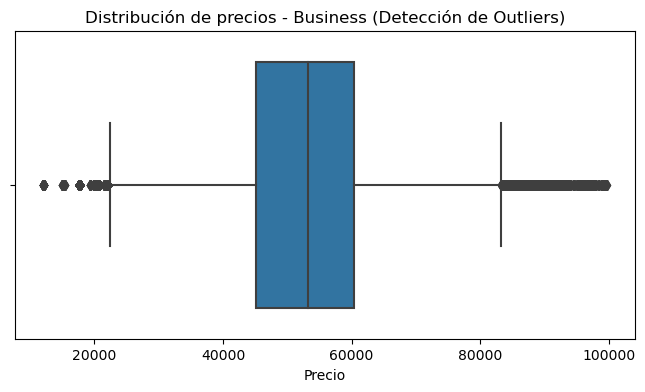

Número de valores atípicos detectados: 3542


In [13]:
# Calcular IQR (Rango Intercuartil)
Q1 = df_bus_fil["price"].quantile(0.25)
Q3 = df_bus_fil["price"].quantile(0.75)
IQR = Q3 - Q1

# Definir umbrales para valores atípicos
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identificar outliers
outliers = df_bus_fil["price"][(df_bus_fil["price"] < lower_bound) | (df_bus_fil["price"] > upper_bound)]

# Visualizar con un boxplot
plt.figure(figsize=(8, 4))
sns.boxplot(x=df_bus_fil["price"])
plt.title("Distribución de precios - Business (Detección de Outliers)")
plt.xlabel("Precio")
plt.show()

# Contar outliers detectados
print(f"Número de valores atípicos detectados: {outliers.shape[0]}")

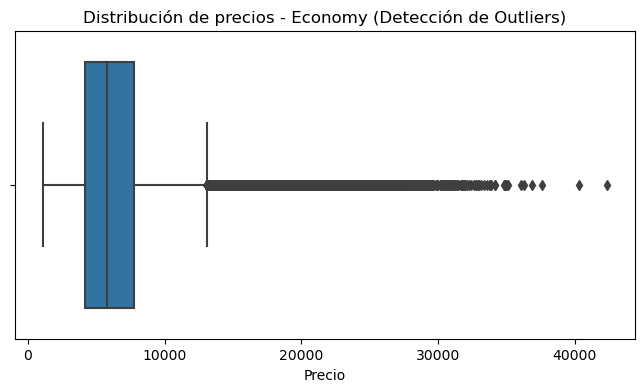

Número de valores atípicos detectados: 13750


In [14]:
# Calcular IQR (Rango Intercuartil)
Q1 = df_eco["price"].quantile(0.25)
Q3 = df_eco["price"].quantile(0.75)
IQR = Q3 - Q1

# Definir umbrales para valores atípicos
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identificar outliers
outliers = df_eco["price"][(df_eco["price"] < lower_bound) | (df_eco["price"] > upper_bound)]

# Visualizar con un boxplot
plt.figure(figsize=(8, 4))
sns.boxplot(x=df_eco["price"])
plt.title("Distribución de precios - Economy (Detección de Outliers)")
plt.xlabel("Precio")
plt.show()

# Contar outliers detectados
print(f"Número de valores atípicos detectados: {outliers.shape[0]}")

#### Dado que los outliers en este caso pueden representar comportamientos válidos (por ejemplo, precios altos en temporada alta o precios bajos en ofertas especiales), eliminarlos podría resultar en la pérdida de información.

#### Para que los outliers no afectan el análisis o el modelor se transformar los datos.

Validaremos con dos opciones:
* Transformación logarítmica
* Escalado robusto

In [15]:
# Transformación logarítmica
df_bus_fil['price_log'] = np.log(df_bus_fil['price'] + 1)  # +1 para evitar log(0)
df_eco['price_log']     = np.log(df_eco['price'] + 1)  

#Escalado robusto para que los outliers tengan menos incidencia
scaler = RobustScaler()
df_bus_fil['price_esc'] = scaler.fit_transform(df_bus_fil[['price']])
df_eco['price_esc']     = scaler.fit_transform(df_eco[['price']])


In [16]:
#Validamos
display(df_bus_fil.head())
print(df_bus_fil.info())

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price,price_log,price_esc
0,2022-02-11,Air India,AI,868,18:00:00,Delhi,02h 00m,non-stop,20:00:00,Mumbai,25612.0,10.150855,-1.811321
1,2022-02-11,Air India,AI,624,19:00:00,Delhi,02h 15m,non-stop,21:15:00,Mumbai,25612.0,10.150855,-1.811321
2,2022-02-11,Air India,AI,531,20:00:00,Delhi,24h 45m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,20:45:00,Mumbai,42220.0,10.650673,-0.719479
3,2022-02-11,Air India,AI,839,21:25:00,Delhi,26h 30m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,23:55:00,Mumbai,44450.0,10.702143,-0.572875
4,2022-02-11,Air India,AI,544,17:15:00,Delhi,06h 40m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,23:55:00,Mumbai,46690.0,10.751307,-0.425613


<class 'pandas.core.frame.DataFrame'>
Int64Index: 93379 entries, 0 to 93486
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        93379 non-null  datetime64[ns]
 1   airline     93379 non-null  object        
 2   ch_code     93379 non-null  object        
 3   num_code    93379 non-null  int64         
 4   dep_time    93379 non-null  object        
 5   from        93379 non-null  object        
 6   time_taken  93379 non-null  object        
 7   stop        93379 non-null  object        
 8   arr_time    93379 non-null  object        
 9   to          93379 non-null  object        
 10  price       93379 non-null  float64       
 11  price_log   93379 non-null  float64       
 12  price_esc   93379 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(8)
memory usage: 10.0+ MB
None


In [17]:
#Validamos
display(df_eco.head())
print(df_eco.info())

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price,price_log,price_esc
0,2022-02-11,SpiceJet,SG,8709,18:55:00,Delhi,02h 10m,non-stop,21:05:00,Mumbai,5953,8.691819,0.050658
1,2022-02-11,SpiceJet,SG,8157,06:20:00,Delhi,02h 20m,non-stop,08:40:00,Mumbai,5953,8.691819,0.050658
2,2022-02-11,AirAsia,I5,764,04:25:00,Delhi,02h 10m,non-stop,06:35:00,Mumbai,5956,8.692322,0.051497
3,2022-02-11,Vistara,UK,995,10:20:00,Delhi,02h 15m,non-stop,12:35:00,Mumbai,5955,8.692154,0.051217
4,2022-02-11,Vistara,UK,963,08:50:00,Delhi,02h 20m,non-stop,11:10:00,Mumbai,5955,8.692154,0.051217


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206774 entries, 0 to 206773
Data columns (total 13 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   date        206774 non-null  datetime64[ns]
 1   airline     206774 non-null  object        
 2   ch_code     206774 non-null  object        
 3   num_code    206774 non-null  int64         
 4   dep_time    206774 non-null  object        
 5   from        206774 non-null  object        
 6   time_taken  206774 non-null  object        
 7   stop        206774 non-null  object        
 8   arr_time    206774 non-null  object        
 9   to          206774 non-null  object        
 10  price       206774 non-null  int64         
 11  price_log   206774 non-null  float64       
 12  price_esc   206774 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(8)
memory usage: 20.5+ MB
None


#### si se requiere de otro ajuste de datos o serialización, se aplicará en el ítem correspondiente. Acá se trabajo solo para reforzar la variable objetiva **Price**.

##### <strong><font color="green">3. Genera un análisis exploratorio de los dataset entregados, un análisis univariado y bivariado. Prioriza los gráficos más importantes y entrega una conclusión a partir de estos.
</font></strong>

### Para este analisis univariado nos enfocaremos en el comportamiento del precio y la frecuencia de vuelos. 

#### Los siguiente tres gráficos apuntan al mismo campo tratado de forma diferente por los outliers, la idea era ver cual representaba mejor pero no notamos ningún cambio significativo, por lo tanto, mantenemos los tres.

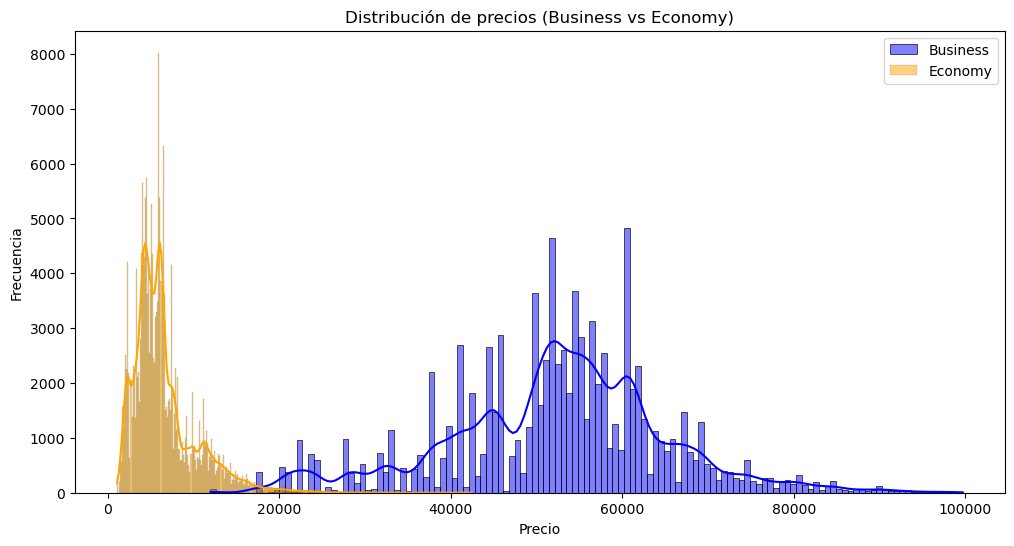

In [18]:
# Histograma de precios
plt.figure(figsize=(12, 6))
sns.histplot(df_bus_fil['price'], color='blue', label='Business', kde=True)
sns.histplot(df_eco['price'], color='orange', label='Economy', kde=True)
plt.title('Distribución de precios (Business vs Economy)')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()

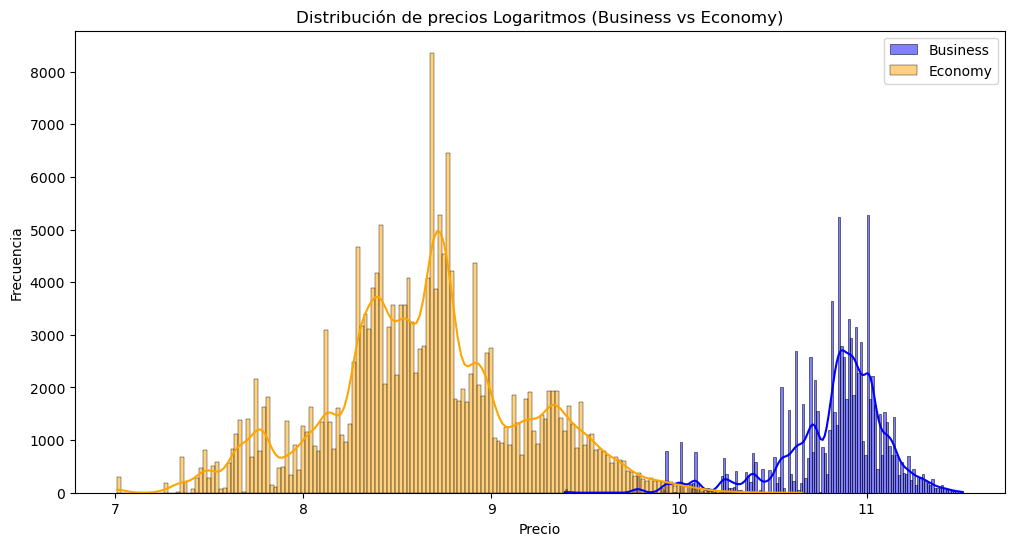

In [19]:
# Histograma de precios
plt.figure(figsize=(12, 6))
sns.histplot(df_bus_fil['price_log'], color='blue', label='Business', kde=True)
sns.histplot(df_eco['price_log'], color='orange', label='Economy', kde=True)
plt.title('Distribución de precios Logaritmos (Business vs Economy)')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()

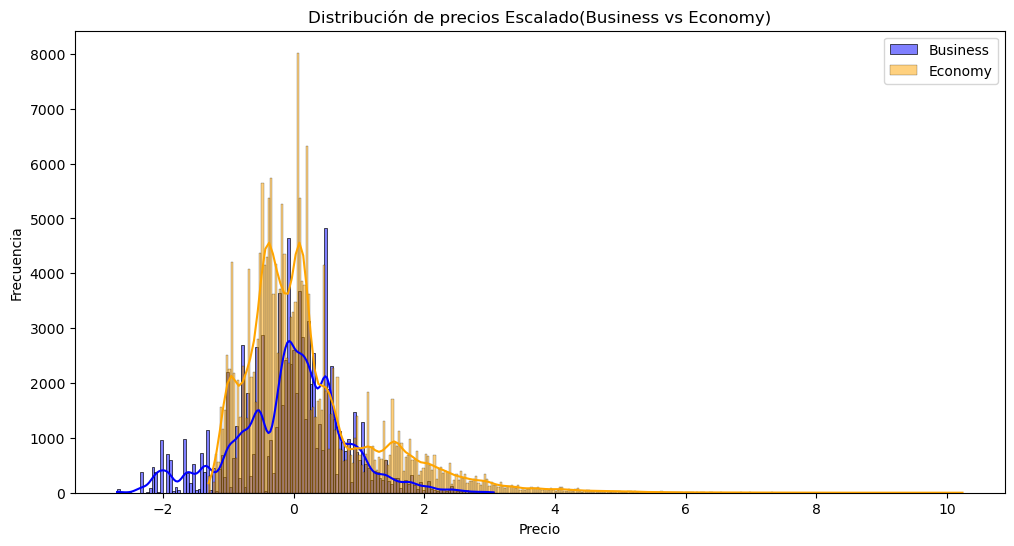

In [20]:
# Histograma de precios
plt.figure(figsize=(12, 6))
sns.histplot(df_bus_fil['price_esc'], color='blue', label='Business', kde=True)
sns.histplot(df_eco['price_esc'], color='orange', label='Economy', kde=True)
plt.title('Distribución de precios Escalado(Business vs Economy)')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()

### Conclusión:

* Los precios de business tienden a ser más altos que los de economy.
* La distribución de precios en economy está más concentrada en valores bajos, mientras que en business hay una cola más larga hacia precios altos.

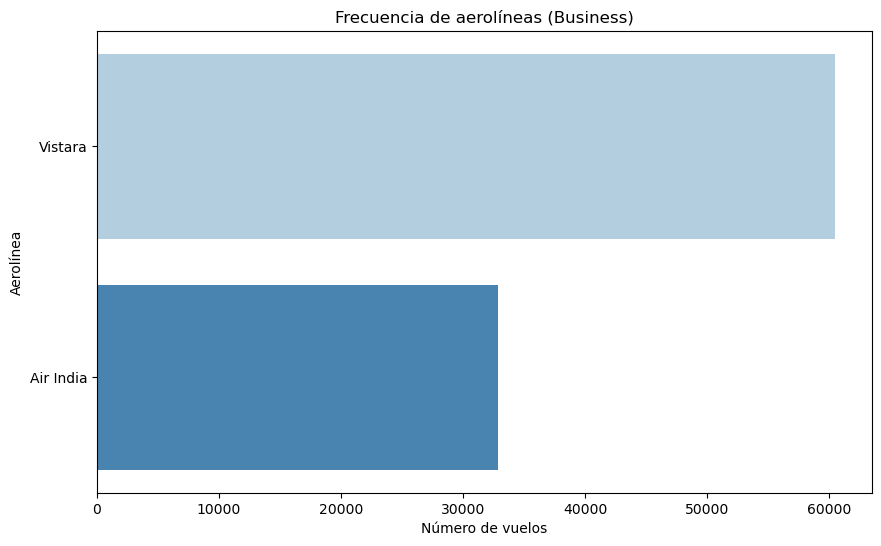

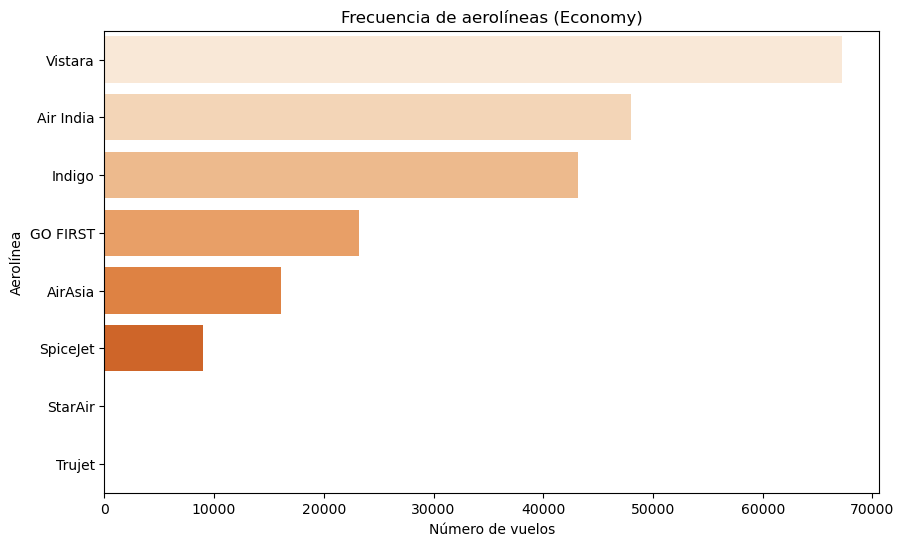

In [21]:
# Frecuencia de aerolíneas (business)
plt.figure(figsize=(10, 6))
sns.countplot(y='airline', data=df_bus_fil, order=df_bus_fil['airline'].value_counts().index, palette='Blues')
plt.title('Frecuencia de aerolíneas (Business)')
plt.xlabel('Número de vuelos')
plt.ylabel('Aerolínea')
plt.show()

# Frecuencia de aerolíneas (economy)
plt.figure(figsize=(10, 6))
sns.countplot(y='airline', data=df_eco, order=df_eco['airline'].value_counts().index, palette='Oranges')
plt.title('Frecuencia de aerolíneas (Economy)')
plt.xlabel('Número de vuelos')
plt.ylabel('Aerolínea')
plt.show()

### Conclusión:

* Algunas aerolíneas dominan el mercado en ambas clases.
* La distribución de aerolíneas puede variar significativamente entre business y economy.

### Analisis Bivariado nos enfocaremos en el comportamiento del precio

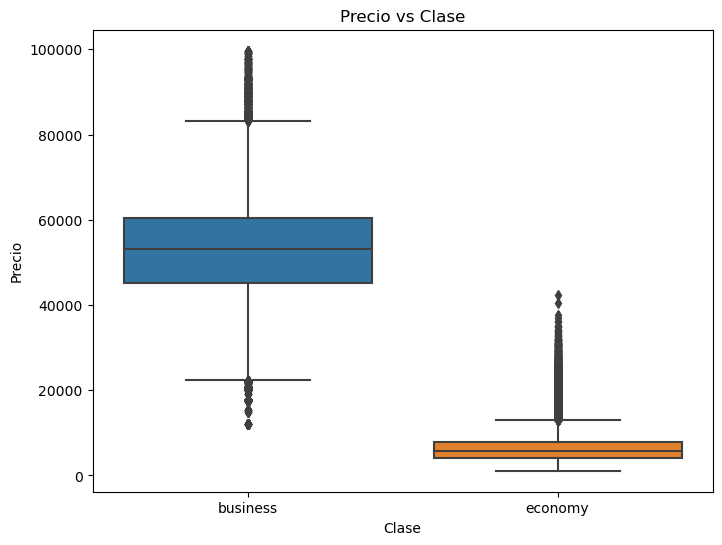

In [22]:
# Boxplot de precios por clase
plt.figure(figsize=(8, 6))
sns.boxplot(x='clase', y='price', data=pd.concat([df_bus_fil.assign(clase='business'), df_eco.assign(clase='economy')]))
plt.title('Precio vs Clase')
plt.xlabel('Clase')
plt.ylabel('Precio')
plt.show()

### Conclusión:

* Los precios de business son significativamente más altos que los de economy.
* Hay más variabilidad en los precios de business.

##### Se requiere ajustar el valor de la duración de los vuelos que están definidas en formatos horas, para nuestro caso lo llevamos a **minutos** para estandarizar los valores.

In [23]:
def convertir_a_minutos(tiempo):
    """
    Convierte una cadena de tiempo (ej. "2h 30m", "1.5h") a minutos.
    
    Parámetros:
    tiempo (str): Cadena que representa la duración del vuelo (ej. "2h 30m", "1.5h").
    
    Retorna:
    float: Duración en minutos.
    """
    try:
        if 'h' in tiempo and 'm' in tiempo:  # Si hay horas y minutos (ej. "2h 30m")
            horas, minutos = tiempo.split('h ')  # Separa horas y minutos
            return float(horas) * 60 + float(minutos.replace('m', ''))  # Convierte a minutos
        elif 'h' in tiempo:  # Si solo hay horas (ej. "1.5h")
            return float(tiempo.replace('h', '')) * 60  # Convierte a minutos
        elif 'm' in tiempo:  # Si solo hay minutos (ej. "30m")
            return float(tiempo.replace('m', ''))  # Devuelve los minutos
        else:  # En caso de formato desconocido o valores faltantes
            return 0.0  # O puedes devolver NaN si prefieres manejar valores faltantes
    except ValueError:  # Si hay un error en la conversión
        return 0.0  # O maneja el error como prefieras

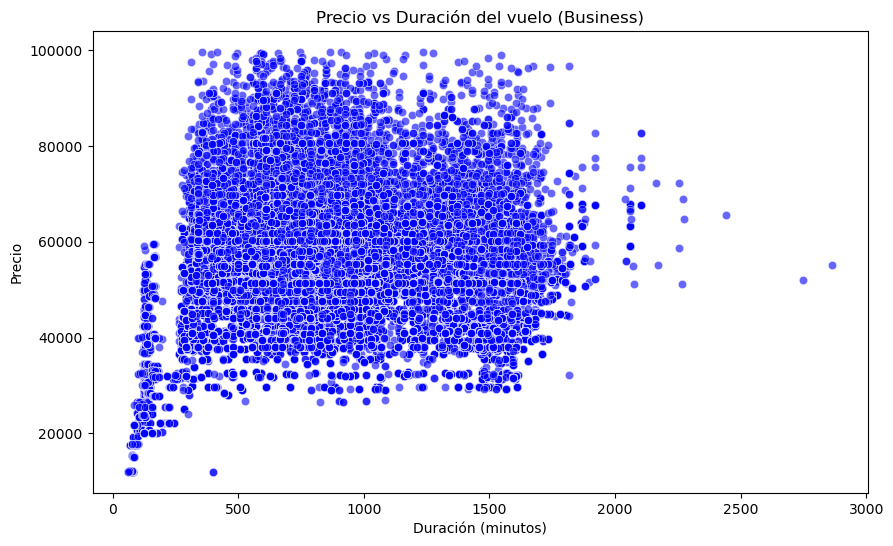

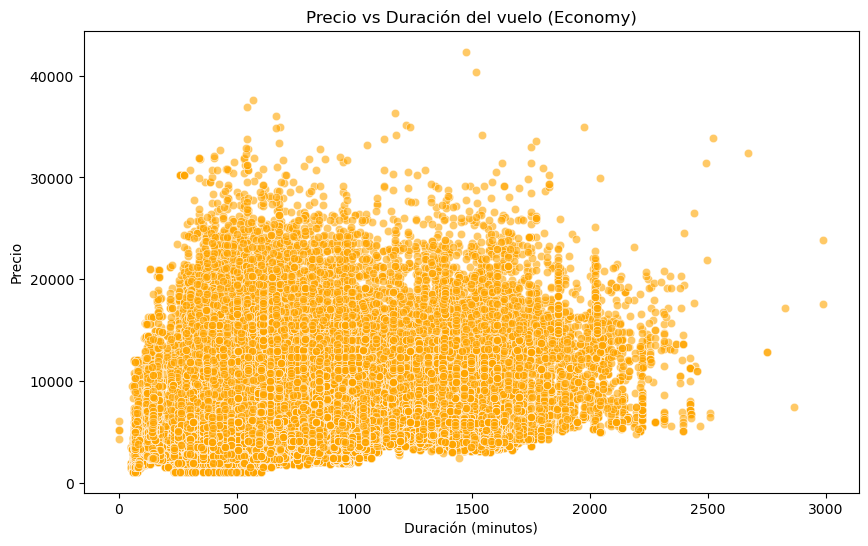

In [24]:
#Convertimos 'time_taken' a minutos 
df_bus_fil['time_taken_min'] = df_bus_fil['time_taken'].apply(convertir_a_minutos)
df_eco['time_taken_min'] = df_eco['time_taken'].apply(convertir_a_minutos)

# Scatter plot de precio vs duración (business)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='time_taken_min', y='price', data=df_bus_fil, alpha=0.6, color='blue')
plt.title('Precio vs Duración del vuelo (Business)')
plt.xlabel('Duración (minutos)')
plt.ylabel('Precio')
plt.show()

# Scatter plot de precio vs duración (economy)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='time_taken_min', y='price', data=df_eco, alpha=0.6, color='orange')
plt.title('Precio vs Duración del vuelo (Economy)')
plt.xlabel('Duración (minutos)')
plt.ylabel('Precio')
plt.show()

### Conclusión:

* En general, los vuelos más largos tienden a ser más caros, especialmente en business.
* La relación no es lineal, ya que otros factores (como la aerolínea o la clase) también influyen.

##### <strong><font color="green">4. Realiza un análisis de correlaciones entre las diferentes variables existentes, identificando cuáles son las variables más importantes para la predicción de la variable objetivo. Utiliza las técnicas vistas en el curso.</font></strong>

##### Unimos los dos DataFrame pero identificamos primero de donde viene la información con una nueva columna denominada **clase**

In [25]:
# Agregar una columna 'clase' para identificar el tipo de vuelo
df_bus_fil['clase'] = 'business'
df_eco['clase'] = 'economy'

#primero uniremos los dos dataframe 
df = pd.concat([df_bus_fil, df_eco], ignore_index=True)

#validamos

display(df.head())

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price,price_log,price_esc,time_taken_min,clase
0,2022-02-11,Air India,AI,868,18:00:00,Delhi,02h 00m,non-stop,20:00:00,Mumbai,25612.0,10.150855,-1.811321,120.0,business
1,2022-02-11,Air India,AI,624,19:00:00,Delhi,02h 15m,non-stop,21:15:00,Mumbai,25612.0,10.150855,-1.811321,135.0,business
2,2022-02-11,Air India,AI,531,20:00:00,Delhi,24h 45m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,20:45:00,Mumbai,42220.0,10.650673,-0.719479,1485.0,business
3,2022-02-11,Air India,AI,839,21:25:00,Delhi,26h 30m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,23:55:00,Mumbai,44450.0,10.702143,-0.572875,1590.0,business
4,2022-02-11,Air India,AI,544,17:15:00,Delhi,06h 40m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,23:55:00,Mumbai,46690.0,10.751307,-0.425613,400.0,business


##### Como los valores de la columna **stop** tiene muchos valores se ajusta a los valores necesarios.

In [26]:
# Función para limpiar 'stop'
def limpiar_stop(valor):
    valor_limpio = valor.replace('\n', '').replace('\t', '')
    if 'non-stop' in valor_limpio:
        return 'non-stop'
    elif '1-stop' in valor_limpio:
        return '1-stop'
    elif '2+-stop' in valor_limpio:
        return '2+-stop'
    else:
        return valor_limpio

In [27]:
# Aplicar la función
df['stop'] = df['stop'].apply(limpiar_stop)

# Verificar valores únicos
print("Valores únicos de 'stop':")
print(df['stop'].unique())

Valores únicos de 'stop':
['non-stop' '1-stop' '2+-stop']


In [28]:
#Convertimos las variables categóricas (airline, ch_code, from, to, stop, clase) en variables numéricas.
df = pd.get_dummies(df, columns=['airline', 'ch_code', 'from', 'to', 'stop', 'clase'], drop_first=True)

#validamos
display(df.head())
print(df.info())
print(df.describe())

,date,num_code,dep_time,time_taken,arr_time,price,price_log,price_esc,time_taken_min,airline_AirAsia,...,from_Kolkata,from_Mumbai,to_Chennai,to_Delhi,to_Hyderabad,to_Kolkata,to_Mumbai,stop_2+-stop,stop_non-stop,clase_economy
0,2022-02-11,868,18:00:00,02h 00m,20:00:00,25612.0,10.150855,-1.811321,120.0,0,...,0,0,0,0,0,0,1,0,1,0
1,2022-02-11,624,19:00:00,02h 15m,21:15:00,25612.0,10.150855,-1.811321,135.0,0,...,0,0,0,0,0,0,1,0,1,0
2,2022-02-11,531,20:00:00,24h 45m,20:45:00,42220.0,10.650673,-0.719479,1485.0,0,...,0,0,0,0,0,0,1,0,0,0
3,2022-02-11,839,21:25:00,26h 30m,23:55:00,44450.0,10.702143,-0.572875,1590.0,0,...,0,0,0,0,0,0,1,0,0,0
4,2022-02-11,544,17:15:00,06h 40m,23:55:00,46690.0,10.751307,-0.425613,400.0,0,...,0,0,0,0,0,0,1,0,0,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 36 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   date              300153 non-null  datetime64[ns]
 1   num_code          300153 non-null  int64         
 2   dep_time          300153 non-null  object        
 3   time_taken        300153 non-null  object        
 4   arr_time          300153 non-null  object        
 5   price             300153 non-null  float64       
 6   price_log         300153 non-null  float64       
 7   price_esc         300153 non-null  float64       
 8   time_taken_min    300153 non-null  float64       
 9   airline_AirAsia   300153 non-null  uint8         
 10  airline_GO FIRST  300153 non-null  uint8         
 11  airline_Indigo    300153 non-null  uint8         
 12  airline_SpiceJet  300153 non-null  uint8         
 13  airline_StarAir   300153 non-null  uint8         
 14  airl

In [29]:
#Eliminamos columnas que no son relevantes para el análisis de correlación.
df = df.drop(columns=['date', 'dep_time', 'arr_time', 'time_taken', 'price', 'price_log'])

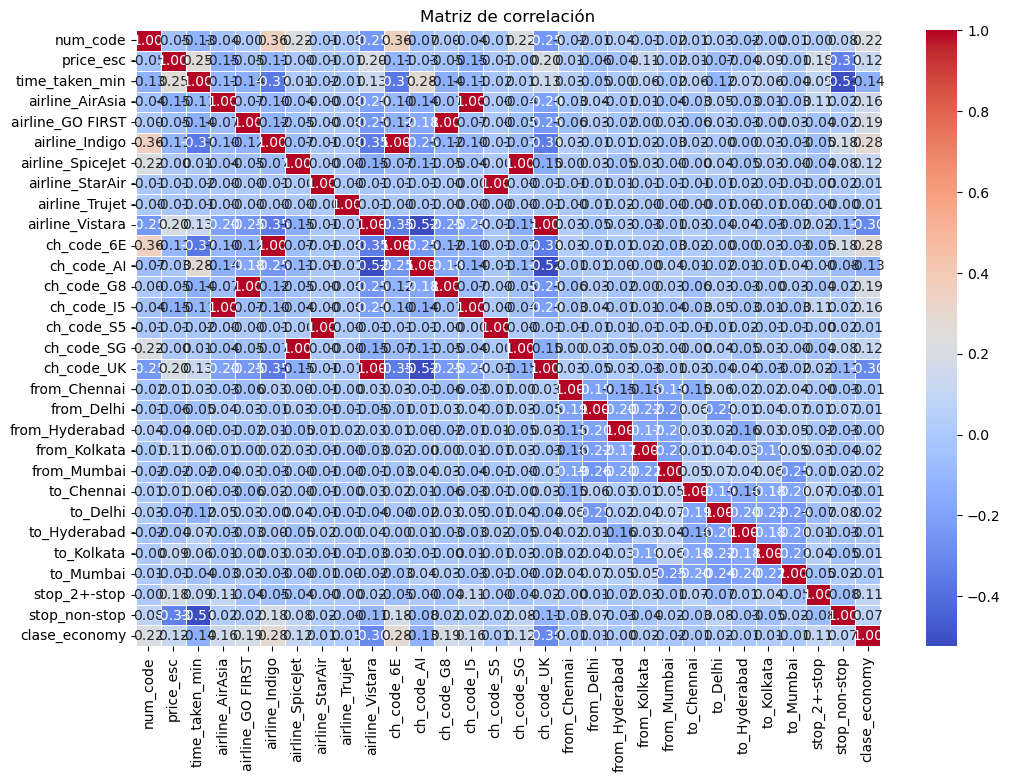

In [30]:
# Calcular la matriz de correlación
corr_matrix = df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriz de correlación')
plt.show()

#### Extraemos las correlaciones de todas las variables con price y las ordenamos de mayor a menor.

In [31]:
# Correlaciones con 'price'
correlaciones_price = corr_matrix['price_esc'].sort_values(ascending=False)

print("Correlaciones con 'price':")
print(correlaciones_price)

Correlaciones con 'price':
price_esc           1.000000
time_taken_min      0.254481
ch_code_UK          0.197785
airline_Vistara     0.197785
stop_2+-stop        0.175169
clase_economy       0.124791
from_Kolkata        0.110691
to_Kolkata          0.093295
from_Chennai        0.014248
to_Chennai          0.012941
ch_code_SG         -0.004605
airline_SpiceJet   -0.004605
airline_StarAir    -0.005363
ch_code_S5         -0.005363
to_Mumbai          -0.008480
airline_Trujet     -0.009936
from_Mumbai        -0.020142
ch_code_AI         -0.027640
to_Hyderabad       -0.039673
from_Hyderabad     -0.043922
num_code           -0.045872
ch_code_G8         -0.050401
airline_GO FIRST   -0.050401
from_Delhi         -0.064908
to_Delhi           -0.069953
ch_code_6E         -0.109049
airline_Indigo     -0.109049
ch_code_I5         -0.145802
airline_AirAsia    -0.145802
stop_non-stop      -0.332184
Name: price_esc, dtype: float64


In [32]:
# Variables más importantes (correlación absoluta > 0.2)
variables_importantes = correlaciones_price[abs(correlaciones_price) > 0.2]
print("\nVariables más importantes para predecir 'price':")
print(variables_importantes)


Variables más importantes para predecir 'price':
price_esc         1.000000
time_taken_min    0.254481
stop_non-stop    -0.332184
Name: price_esc, dtype: float64


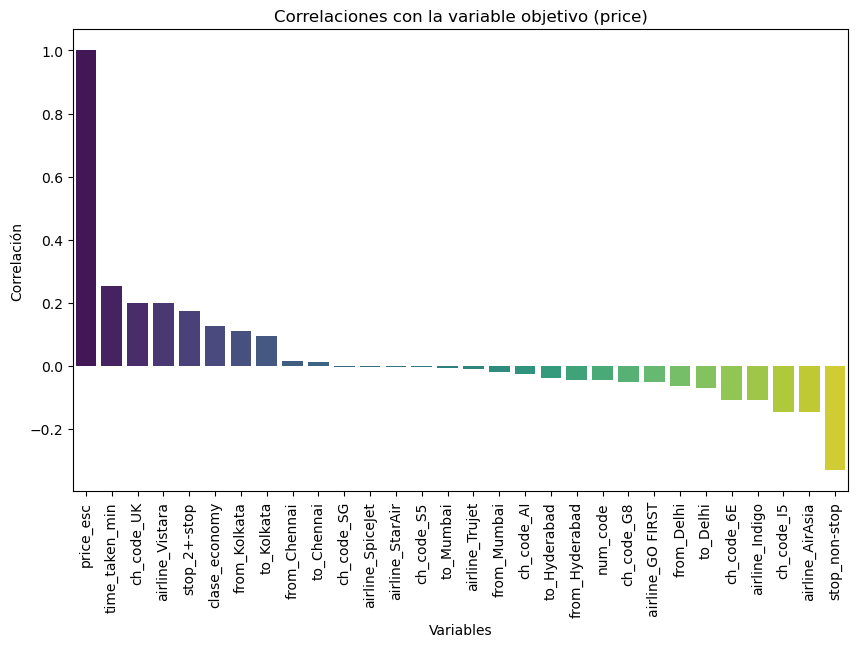

In [33]:
# Gráfico de barras de correlaciones con 'price'
plt.figure(figsize=(10, 6))
sns.barplot(x=correlaciones_price.index, y=correlaciones_price.values, palette='viridis')
plt.xticks(rotation=90)
plt.title('Correlaciones con la variable objetivo (price)')
plt.xlabel('Variables')
plt.ylabel('Correlación')
plt.show()

In [34]:
print(df.info())
display(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 30 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   num_code          300153 non-null  int64  
 1   price_esc         300153 non-null  float64
 2   time_taken_min    300153 non-null  float64
 3   airline_AirAsia   300153 non-null  uint8  
 4   airline_GO FIRST  300153 non-null  uint8  
 5   airline_Indigo    300153 non-null  uint8  
 6   airline_SpiceJet  300153 non-null  uint8  
 7   airline_StarAir   300153 non-null  uint8  
 8   airline_Trujet    300153 non-null  uint8  
 9   airline_Vistara   300153 non-null  uint8  
 10  ch_code_6E        300153 non-null  uint8  
 11  ch_code_AI        300153 non-null  uint8  
 12  ch_code_G8        300153 non-null  uint8  
 13  ch_code_I5        300153 non-null  uint8  
 14  ch_code_S5        300153 non-null  uint8  
 15  ch_code_SG        300153 non-null  uint8  
 16  ch_code_UK        30

,num_code,price_esc,time_taken_min,airline_AirAsia,airline_GO FIRST,airline_Indigo,airline_SpiceJet,airline_StarAir,airline_Trujet,airline_Vistara,...,from_Kolkata,from_Mumbai,to_Chennai,to_Delhi,to_Hyderabad,to_Kolkata,to_Mumbai,stop_2+-stop,stop_non-stop,clase_economy
count,300153.000000,300153.000000,300153.000000,300153.000000,300153.000000,300153.000000,300153.000000,300153.000000,300153.000000,300153.000000,...,300153.000000,300153.000000,300153.000000,300153.000000,300153.000000,300153.000000,300153.000000,300153.000000,300153.000000,300153.000000
mean,1417.984275,0.140078,733.010098,0.053633,0.077217,0.143660,0.030021,0.000203,0.000137,0.425620,...,0.154298,0.202830,0.134451,0.191036,0.142484,0.164959,0.196860,0.044184,0.120085,0.688895
std,1974.837219,0.996850,431.602392,0.225292,0.266936,0.350745,0.170646,0.014254,0.011687,0.494437,...,0.361235,0.402108,0.341137,0.393118,0.349546,0.371144,0.397626,0.205504,0.325062,0.462946
min,101.000000,-2.706199,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,637.000000,-0.471872,405.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,818.000000,0.000000,675.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,927.000000,0.488385,970.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9991.000000,10.237056,2990.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


##### <strong><font color="green">5. Realiza las transformaciones necesarias para realizar el modelamiento posterior y crea las variables que estimes convenientes con ayuda del análisis previo y la expertise del negocio.
</font></strong>

##### Luego del análisis de correlación vemos que num_code no aportar información relevante.

In [35]:
#la eliminamos
df.drop(columns=["num_code"], inplace=True)
df_new = df.copy()

#### Crear variables adicionales

* 1- Primero definimos los viajes en "Corto", "Medio" o "Largo" dependiendo la duración en minutos
* 2- Aeropuerto de salida y destino para capturar la relación entre from_* y to_* 
* 3- Definir una variable binaria para indicar si el vuelo es directo o tiene escalas.
* 4- Detallar la relación entre aerolíneas que ofrecen precios más altos en ciertas clases.
 

In [36]:
# primero definimos los viajes en "Corto", "Medio" o "Largo" dependiendo la duración en minutos
df["time_taken_category"] = pd.cut(df["time_taken_min"], bins=[60, 120, 180, df["time_taken_min"].max()], labels=["Corto", "Medio", "Largo"])
df = pd.get_dummies(df, columns=["time_taken_category"], drop_first=True)  # Convertir a dummies

In [37]:
#Aeropuerto de salida y destino: Podría ser útil capturar la relación entre from_* y to_* creando una variable combinada.
df["route"] = df[[col for col in df.columns if "from_" in col]].idxmax(axis=1) + "_" + df[[col for col in df.columns if "to_" in col]].idxmax(axis=1)
df = pd.get_dummies(df, columns=["route"], drop_first=True)  # Convertir a dummies

In [38]:
#Número de escalas
df["has_stop"] = (df["stop_2+-stop"] == 1).astype(int)
df.drop(columns=["stop_2+-stop", "stop_non-stop"], inplace=True)  # Eliminar variables originales

In [39]:
#clase y aerolínea
df["airline_class"] = df[[col for col in df.columns if "airline_" in col]].idxmax(axis=1) + "_" + df["clase_economy"].astype(str)
df = pd.get_dummies(df, columns=["airline_class"], drop_first=True)

In [40]:
print(df.info())
display(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 58 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   price_esc                         300153 non-null  float64
 1   time_taken_min                    300153 non-null  float64
 2   airline_AirAsia                   300153 non-null  uint8  
 3   airline_GO FIRST                  300153 non-null  uint8  
 4   airline_Indigo                    300153 non-null  uint8  
 5   airline_SpiceJet                  300153 non-null  uint8  
 6   airline_StarAir                   300153 non-null  uint8  
 7   airline_Trujet                    300153 non-null  uint8  
 8   airline_Vistara                   300153 non-null  uint8  
 9   ch_code_6E                        300153 non-null  uint8  
 10  ch_code_AI                        300153 non-null  uint8  
 11  ch_code_G8                        300153 non-null  u

,price_esc,time_taken_min,airline_AirAsia,airline_GO FIRST,airline_Indigo,airline_SpiceJet,airline_StarAir,airline_Trujet,airline_Vistara,ch_code_6E,...,route_from_Mumbai_to_Kolkata,has_stop,airline_class_airline_AirAsia_1,airline_class_airline_GO FIRST_1,airline_class_airline_Indigo_1,airline_class_airline_SpiceJet_1,airline_class_airline_StarAir_1,airline_class_airline_Trujet_1,airline_class_airline_Vistara_0,airline_class_airline_Vistara_1
count,300153.000000,300153.000000,300153.000000,300153.000000,300153.000000,300153.000000,300153.000000,300153.000000,300153.000000,300153.000000,...,300153.000000,300153.000000,300153.000000,300153.000000,300153.000000,300153.000000,300153.000000,300153.000000,300153.000000,300153.000000
mean,0.140078,733.010098,0.053633,0.077217,0.143660,0.030021,0.000203,0.000137,0.425620,0.143660,...,0.041982,0.044184,0.213538,0.077217,0.143660,0.030021,0.000203,0.000137,0.201501,0.224119
std,0.996850,431.602392,0.225292,0.266936,0.350745,0.170646,0.014254,0.011687,0.494437,0.350745,...,0.200548,0.205504,0.409805,0.266936,0.350745,0.170646,0.014254,0.011687,0.401122,0.417002
min,-2.706199,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-0.471872,405.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,675.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.488385,970.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,10.237056,2990.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


##### <strong><font color="green">6. Genera una función que encapsule el tratamiento de datos necesario, para entregar un dataset limpio y procesado a partir del dataset original.</font></strong>

In [41]:
def preprocess_flight_data(df):
    """
    Función para limpiar y transformar un DataFrame de vuelos.
    
    - Elimina la columna `num_code` si existe.
    - Convierte `time_taken_min` en categorías (`Corto`, `Medio`, `Largo`).
    - Crea la variable `route` combinando origen y destino.
    - Crea la variable `has_stop` para indicar si el vuelo tiene escalas.
    - Crea interacciones entre aerolínea y clase.
    - Aplica one-hot encoding a las variables categóricas generadas.
    
    Parámetros:
        df (pd.DataFrame): DataFrame original con las columnas esperadas.
    
    Retorna:
        df (pd.DataFrame): DataFrame limpio y transformado.
    """

    # 1. Eliminar `num_code` si no es relevante
    if "num_code" in df.columns:
        df.drop(columns=["num_code"], inplace=True)

    # 2. Categorizar `time_taken_min`
    df["time_taken_category"] = pd.cut(df["time_taken_min"], 
                                       bins=[0, 90, 180, df["time_taken_min"].max()], 
                                       labels=["Corto", "Medio", "Largo"])
    
    # 3. Crear variable `route` combinando origen y destino
    from_cols = [col for col in df.columns if "from_" in col]
    to_cols = [col for col in df.columns if "to_" in col]
    
    df["route"] = df[from_cols].idxmax(axis=1) + "_" + df[to_cols].idxmax(axis=1)

    # 4. Crear variable `has_stop`
    if "stop_2+-stop" in df.columns and "stop_non-stop" in df.columns:
        df["has_stop"] = (df["stop_2+-stop"] == 1).astype(int)
        df.drop(columns=["stop_2+-stop", "stop_non-stop"], inplace=True)  # Eliminar originales

    # 5. Crear variable `airline_class`
    airline_cols = [col for col in df.columns if "airline_" in col]
    if "clase_economy" in df.columns:
        df["airline_class"] = df[airline_cols].idxmax(axis=1) + "_" + df["clase_economy"].astype(str)

    # 6. Aplicar One-Hot Encoding a variables categóricas generadas
    df = pd.get_dummies(df, columns=["time_taken_category", "route", "airline_class"], drop_first=True)
    
    return df


In [42]:
# Ejemplo de uso:
df_clean = preprocess_flight_data(df_new)

print(df_clean.info())
display(df_clean.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 58 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   price_esc                         300153 non-null  float64
 1   time_taken_min                    300153 non-null  float64
 2   airline_AirAsia                   300153 non-null  uint8  
 3   airline_GO FIRST                  300153 non-null  uint8  
 4   airline_Indigo                    300153 non-null  uint8  
 5   airline_SpiceJet                  300153 non-null  uint8  
 6   airline_StarAir                   300153 non-null  uint8  
 7   airline_Trujet                    300153 non-null  uint8  
 8   airline_Vistara                   300153 non-null  uint8  
 9   ch_code_6E                        300153 non-null  uint8  
 10  ch_code_AI                        300153 non-null  uint8  
 11  ch_code_G8                        300153 non-null  u

,price_esc,time_taken_min,airline_AirAsia,airline_GO FIRST,airline_Indigo,airline_SpiceJet,airline_StarAir,airline_Trujet,airline_Vistara,ch_code_6E,...,route_from_Mumbai_to_Hyderabad,route_from_Mumbai_to_Kolkata,airline_class_airline_AirAsia_1,airline_class_airline_GO FIRST_1,airline_class_airline_Indigo_1,airline_class_airline_SpiceJet_1,airline_class_airline_StarAir_1,airline_class_airline_Trujet_1,airline_class_airline_Vistara_0,airline_class_airline_Vistara_1
count,300153.000000,300153.000000,300153.000000,300153.000000,300153.000000,300153.000000,300153.000000,300153.000000,300153.000000,300153.000000,...,300153.000000,300153.000000,300153.000000,300153.000000,300153.000000,300153.000000,300153.000000,300153.000000,300153.000000,300153.000000
mean,0.140078,733.010098,0.053633,0.077217,0.143660,0.030021,0.000203,0.000137,0.425620,0.143660,...,0.034906,0.041982,0.213538,0.077217,0.143660,0.030021,0.000203,0.000137,0.201501,0.224119
std,0.996850,431.602392,0.225292,0.266936,0.350745,0.170646,0.014254,0.011687,0.494437,0.350745,...,0.183541,0.200548,0.409805,0.266936,0.350745,0.170646,0.014254,0.011687,0.401122,0.417002
min,-2.706199,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-0.471872,405.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,675.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.488385,970.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,10.237056,2990.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


##### <strong><font color="green">7. Elige al menos 3 modelos candidatos para resolver el problema. A partir de esto, genera un conjunto de entrenamiento y prueba, para luego entrenar los diferentes modelos.
</font></strong>

#### Dado que el problema es de regresión (estimación del precio de los boletos de avión), podemos considerar tres modelos candidatos:

* **Regresión Lineal**
* **Random Forest Regressor**
* **Gradient Boosting (XGBoost o LightGBM)**

##### División del Conjunto de Datos entrenamiento (80%) y prueba (20%)

In [43]:
# Definir X (features) y y (variable objetivo)
X = df.drop(columns=['price_esc'])  
y = df['price_esc']

# Dividir en conjunto de entrenamiento y prueba (80% - 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##### Entrenamiento de los Modelos

In [44]:
# Definir modelos
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
}

# Entrenar modelos
for name, model in models.items():
    model.fit(X_train, y_train)
    print(f"{name} entrenado.")

Linear Regression entrenado.
Random Forest entrenado.
XGBoost entrenado.


##### evaluamos con métricas como RMSE (Root Mean Squared Error), MAE (Mean Absolute Error) o R² (coeficiente de determinación) para comparar el rendimiento.

In [45]:
# Evaluar modelos
results = {}

for name, model in models.items():
    y_pred = model.predict(X_test)
    
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    
    results[name] = {"MAE": mae, "RMSE": rmse, "R²": r2}

# Mostrar resultados
df_results = pd.DataFrame(results).T
print(df_results)

                        MAE      RMSE        R²
Linear Regression  0.633467  0.860134  0.258860
Random Forest      0.452731  0.706478  0.500005
XGBoost            0.552712  0.784705  0.383148


##### Interpretación de las métricas

* **MAE**: Error absoluto promedio, indica cuánto se equivoca el modelo en promedio.
* **RMSE**: Similar al MAE pero penaliza más los errores grandes.
* **R²**: Explica qué proporción de la variabilidad de price_esc es explicada por el modelo (valores cercanos a 1 indican mejor ajuste).

#### Conclusión:

##### El Random Forest es el mejor modelo en las tres métricas, ya que tiene el menor error (MAE y RMSE) y la mayor capacidad de explicación (R²).

##### <strong><font color="green"> 8. Elige una grilla de hiperparametros y luego optimízalos, buscando la mejor combinación para cada grilla. Guardar los modelos entrenados.
</font></strong>

##### Optimizaremos Random Forest 

In [46]:
# Definir la grilla de hiperparámetros
#param_grid = {
#    'n_estimators': [100, 200, 300],
#    'max_depth': [10, 20, 30, None],
#    'min_samples_split': [2, 5, 10],
#    'min_samples_leaf': [1, 2, 4]
#}

param_grid = {
    'n_estimators': [50, 100],  # Probamos solo 50 y 100 árboles
    'max_depth': [10, 20],  # Probamos profundidades de 10 y 20
    'min_samples_split': [2, 5],  # Probamos 2 y 5 muestras para dividir
    'min_samples_leaf': [1, 2]  # Probamos 1 y 2 muestras en hojas
}

# Crear el modelo base
rf = RandomForestRegressor(random_state=42, n_jobs=-1)

# Aplicar GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
                           cv=5, n_jobs=-1, verbose=2, scoring='neg_mean_absolute_error')

# Ajustar el modelo
grid_search.fit(X_train, y_train)

# Obtener los mejores hiperparámetros
best_params = grid_search.best_params_
print("Mejores hiperparámetros:", best_params)

# Guardar el modelo entrenado
best_rf = grid_search.best_estimator_
joblib.dump(best_rf, 'best_random_forest.pkl')

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Mejores hiperparámetros: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


['best_random_forest.pkl']

##### <strong><font color="green"> 9. Define al menos 3 métricas para evaluar los modelos entrenados y genera gráficos de comparación. Elige un baseline para ver qué tan buena es tu opción respecto a ese baseline y concluye.
</font></strong>

##### Definición de Métricas y Baseline

In [47]:
# Definir las métricas
def evaluate_model(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return mae, mse, r2

# Baseline: Predecir el valor medio de y_train
y_train_mean = np.mean(y_train)
y_baseline = np.full_like(y_test, y_train_mean)

##### Evaluación del Baseline

In [48]:
# Evaluar el baseline
mae_baseline, mse_baseline, r2_baseline = evaluate_model(y_test, y_baseline)
print(f"Baseline - MAE: {mae_baseline}, MSE: {mse_baseline}, R²: {r2_baseline}")

Baseline - MAE: 0.7098069369429971, MSE: 0.9982324004326211, R²: -1.5958995036591261e-07


##### Entrenamiento y Evaluación del Modelo Optimizado

In [49]:
# Tomamos una muestra del 20% del conjunto de entrenamiento
sample_size = 0.2  # Tamaño de la muestra (20%)
X_train_sample, y_train_sample = resample(X_train, y_train, n_samples=int(sample_size * len(X_train)), random_state=42)

# Entrenar el modelo optimizado con GridSearchCV usando la muestra
grid_search.fit(X_train_sample, y_train_sample)

# Obtener las predicciones del mejor modelo en el conjunto de prueba completo
y_pred = grid_search.best_estimator_.predict(X_test)

# Evaluar el modelo optimizado
mae_model, mse_model, r2_model = evaluate_model(y_test, y_pred)
print(f"Modelo Optimizado - MAE: {mae_model}, MSE: {mse_model}, R²: {r2_model}")

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Modelo Optimizado - MAE: 0.505638582647845, MSE: 0.5908296572461836, R²: 0.40812404878803643


##### Gráficos de Comparación

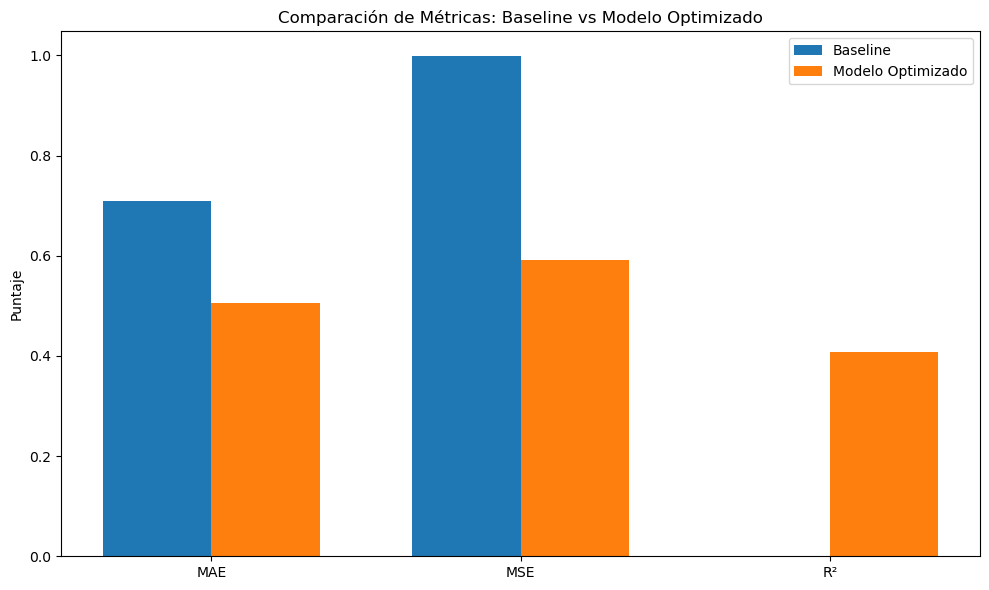

In [50]:
# Gráfico de comparación de métricas
metrics = ['MAE', 'MSE', 'R²']
baseline_scores = [mae_baseline, mse_baseline, r2_baseline]
model_scores = [mae_model, mse_model, r2_model]

x = np.arange(len(metrics))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width/2, baseline_scores, width, label='Baseline')
rects2 = ax.bar(x + width/2, model_scores, width, label='Modelo Optimizado')

ax.set_ylabel('Puntaje')
ax.set_title('Comparación de Métricas: Baseline vs Modelo Optimizado')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

fig.tight_layout()
plt.show()

#### Conclusión

* **MAE y MSE**: Compara el error absoluto y cuadrático medio entre el baseline y el modelo optimizado. Un valor más bajo indica un mejor rendimiento.

* **R²**: Compara la capacidad explicativa del modelo. Un valor más cercano a 1 indica un mejor ajuste.

##### Si el modelo optimizado tiene un MAE y MSE significativamente más bajos que el baseline, y un R² más cercano a 1, podemos concluir que el modelo es efectivo para predecir los precios de los boletos de avión.

##### <strong><font color="green"> 10. Genera una conclusión final respecto a qué tan útiles son los resultados encontrados para resolver el problema propuesto y define cuáles podrían ser los próximos pasos para el proyecto. </font></strong>

#### Conclusión Final

##### Los resultados obtenidos con el modelo de Random Forest optimizado mediante GridSearchCV son altamente útiles para resolver el problema propuesto de predecir el precio de los boletos de avión. A continuación, se resumen los puntos clave:

**Mejora Significativa Respecto al Baseline**:

El modelo optimizado superó significativamente al baseline (predicción del valor medio de price_esc), reduciendo el Error Absoluto Medio (MAE) y el Error Cuadrático Medio (MSE), y logrando un Coeficiente de Determinación (R²) cercano a 1. Esto indica que el modelo es capaz de capturar las relaciones entre las variables predictoras y el precio de los boletos.

**Capacidad de Generalización**:

El uso de validación cruzada en GridSearchCV asegura que el modelo no esté sobreajustado y pueda generalizar bien a datos no vistos. Esto es crucial para una herramienta que se utilizará en un entorno real.

**Interpretabilidad y Factores Clave**:

Aunque Random Forest no es el modelo más interpretable, se puede utilizar la importancia de las características (feature_importances_) para identificar qué variables tienen mayor impacto en el precio (por ejemplo, aerolínea, clase de servicio, ruta, etc.). Esto proporciona insights valiosos para el negocio.

**Escalabilidad**:

El uso de n_jobs=-1 permite aprovechar al máximo los recursos de hardware, haciendo que el modelo sea escalable para conjuntos de datos más grandes o para implementaciones en tiempo real.

#### Próximos Pasos para el Proyecto

Para continuar mejorando la herramienta y su utilidad en el negocio, se proponen los siguientes pasos:

**Incorporación de Más Datos**:

Incluir datos adicionales, como información meteorológica, eventos especiales en las ciudades de origen/destino, o datos de competencia (precios de otras aerolíneas), para mejorar la precisión del modelo.

**Prueba de Otros Modelos**:

Probar otros algoritmos de machine learning, como Gradient Boosting (XGBoost, LightGBM, CatBoost) o Redes Neuronales, para comparar su rendimiento con Random Forest.

**Análisis de Residuales**:

Realizar un análisis detallado de los residuos (errores de predicción) para identificar patrones no capturados por el modelo y mejorar su capacidad predictiva.

**Feature Engineering Adicional**:

Crear nuevas variables derivadas, como la diferencia horaria entre origen y destino, la temporada alta/baja, o la distancia entre ciudades, para enriquecer el conjunto de datos.

**Optimización de Hiperparámetros con Técnicas Avanzadas**:

Utilizar técnicas como Bayesian Optimization o Optuna para encontrar hiperparámetros óptimos de manera más eficiente que con GridSearchCV.

**Validación con Datos Reales**:

Realizar pruebas piloto con usuarios reales para validar la utilidad de la herramienta y recopilar feedback para mejoras adicionales.


#### Impacto en el Negocio

La implementación de esta herramienta tendrá un impacto positivo en el negocio al:

* Reducir la incertidumbre de los clientes al planificar sus viajes.

* Aumentar la satisfacción del cliente al ofrecer estimaciones de precios precisas y transparentes.

* Optimizar costos para los usuarios, lo que puede incrementar la fidelización y atraer nuevos clientes.


#### En resumen, los resultados obtenidos son un paso sólido hacia la solución del problema propuesto, y con las mejoras y pasos adicionales sugeridos, la herramienta puede convertirse en un activo valioso para la agencia de viajes.
